In [2]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read sample data
sample_df = pd.read_csv("../../data/sample_data.csv")
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           1000 non-null   int64  
 1   name               1000 non-null   object 
 2   item_condition_id  1000 non-null   int64  
 3   category_name      996 non-null    object 
 4   brand_name         561 non-null    object 
 5   price              1000 non-null   float64
 6   shipping           1000 non-null   int64  
 7   item_description   1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [4]:
sample_df.name

0                               Polaroid Camera
1                               Vintage Ashtray
2                    Matilda Jane weekender nwt
3                             Red Full Lace Wig
4            EQUATE NICOTINE TRANSDERMAL SYSTEM
                         ...                   
995                                Dansko Clogs
996                             Men's BKE jeans
997               Lularoe L Randy & OS Leggings
998    Rae Dunn Home Bowl Set of 2 Red Interior
999    Wku Fleece Quarter Zip Pullover And Tank
Name: name, Length: 1000, dtype: object

# Explore [Text Feature Extractors](https://scikit-learn.org/stable/modules/feature_extraction.html)
- **CountVectorizer** implements both tokenization and occurrence counting in a single class
- **TfidfTransformer** weight the count features by consider term-frequency.
- **TfidfVectorizer** combines all the options of CountVectorizer and TfidfTransformer in a single mode
- **HashingVectorizer** vectorizes a large text corpus

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [6]:
corpus = sample_df.name.to_list()

In [7]:
vectorizer = TfidfVectorizer(max_features = 50)
X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names()

In [8]:
X.shape

(1000, 50)

<AxesSubplot:>

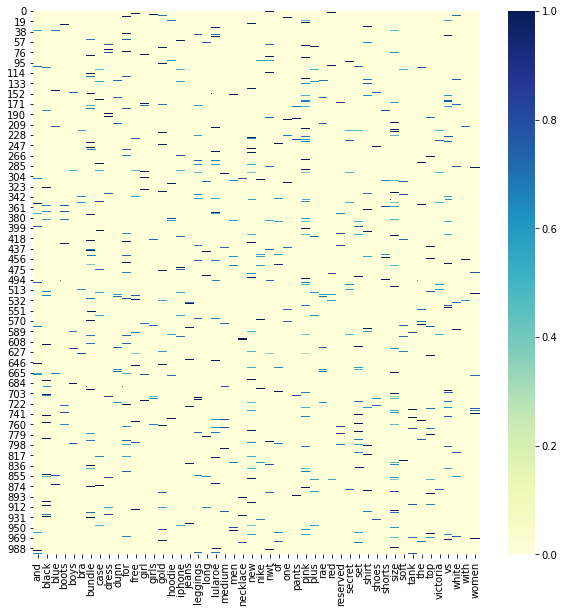

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.toarray(),ax =ax, xticklabels=vectorizer.get_feature_names(),cmap="YlGnBu" )

In [10]:
hv = HashingVectorizer(n_features=50)
hX = hv.fit_transform(corpus)
hX.shape

(1000, 50)

<AxesSubplot:>

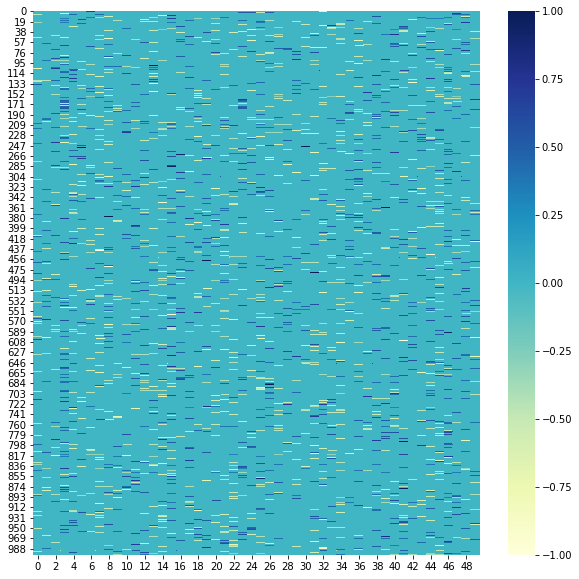

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(hX.toarray(),ax =ax, cmap="YlGnBu" )

# Evaluate Extract Features

## explore target value - prices

In [12]:
sample_df.price.describe()

count    1000.00000
mean       26.58900
std        32.48266
min         3.00000
25%        10.00000
50%        18.00000
75%        29.00000
max       506.00000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

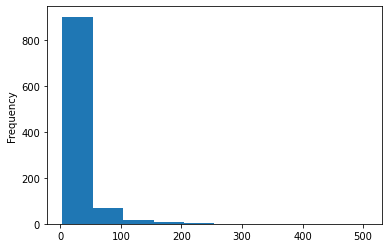

In [13]:
sample_df.price.plot.hist()

In [14]:
y = sample_df.price.values
y.shape

(1000,)

## Train Model + Model Evaluation

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [16]:
hreg = LinearRegression().fit(hX.toarray(), y)
y_hpred = hreg.predict(hX.toarray())

In [17]:
mean_squared_error(y, y_hpred)

1006.373043185519

In [18]:
mean_absolute_error(y, y_hpred)

17.77439522297839

In [19]:
treg = LinearRegression().fit(X.toarray(), y)
y_tpred = treg.predict(X.toarray())

In [20]:
mean_squared_error(y, y_tpred)

972.1624990373222

In [21]:
mean_absolute_error(y, y_tpred)

16.979150875830566